In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ipywidgets import interact, widgets
import plotly.io as pio

In [2]:
# Load dataset
df = pd.read_csv("Modified_OccurrenceDataset_simplified.csv")

In [3]:
df.head()

,id,day,month,year,eventDate,decimalLatitude,decimalLongitude,footprintWKT,bathymetry,shoredistance,sss,sst,occurrenceID,associatedMedia,occurrenceRemarks,month_name,total_interactions_per_month_2022,total_interactions_per_month_2023,total_interactions_per_month_2024
0,ff3f89a4-518d-4e7c-a2dc-dda812013747,0,0,2022,2022,38.289937,-9.041748,MultiPoint ((-9.04174800000000012 38.289937000...,743.2,16220.0,35.49,17.10,1020_ANAV_NR_2310/22,https://geoanavnet.hidrografico.pt/coastal-war...,Novos perigos|Animais Marinhos - InteraÁ„o,NaN,2.0,5.0,1.0
1,716b10c8-5520-4577-9969-abd9f15b049c,30,9,2022,2022-09-30,38.238150,-8.856500,MultiPoint ((-8.85650000000000048 38.238149999...,86.6,7067.0,35.50,17.15,1032_ANAV_NR_2317/22,https://geoanavnet.hidrografico.pt/coastal-war...,Novos perigos|Animais Marinhos - InteraÁ„o,September,3.0,11.0,1.0
2,04513443-a748-4db8-97ff-d7feeb05efe6,0,10,2022,2022-10,38.190013,-9.040319,MultiLineString ((-8.93188499999999941 37.9311...,158.6,22472.0,35.52,17.19,1060_ANAV_NR_2335/22,https://geoanavnet.hidrografico.pt/coastal-war...,Novos perigos|Animais Marinhos - InteraÁ„o,October,6.0,0.0,0.0
3,e908ddf8-bfea-416b-bc95-e3014ed35446,0,10,2022,2022-10,37.022205,-8.738250,MultiPolygon (((-9.01977499999999921 36.908175...,56.0,5857.0,35.79,17.80,1140_ANAV_NR_2385/22,https://geoanavnet.hidrografico.pt/coastal-war...,Requisitos de seguranÁa maritima|Animais Marin...,October,6.0,0.0,0.0
4,c928f316-1827-4fac-b333-2504a40e8936,0,10,2022,2022-10,39.362879,-9.441375,MultiPolygon (((-9.59930400000000006 39.249271...,31.2,2824.0,35.27,16.69,1144_ANAV_NR_2387/22,https://geoanavnet.hidrografico.pt/coastal-war...,Requisitos de seguranÁa maritima|Animais Marin...,October,6.0,0.0,0.0


## Plot Individual Orca Interaction with Event Data

In [4]:
# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Create a categorical column for proper sorting
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

# Create interactive function
def plot_interactions(year='all', month='all'):
    # Filter data
    filtered_df = df.copy()
    if year != 'all':
        filtered_df = filtered_df[filtered_df['year'] == int(year)]
    if month != 'all':
        filtered_df = filtered_df[filtered_df['month_name'] == month]
    
   # Create map
    fig = px.scatter_mapbox(
        filtered_df,
        lat='decimalLatitude',  #latitude column
        lon='decimalLongitude',  #longitude column
        hover_data=['eventDate', 'sss', 'sst', 'bathymetry', 'shoredistance', 'occurrenceID'],  # Adjust columns to show on hover
        title=f'Orca Interactions - Year: {year}, Month: {month}',
        zoom=7,
        height=800
    )
    fig.update_layout(
        mapbox_style="open-street-map",
        mapbox=dict(
            center=dict(
                lat=39.0,   # Center latitude of Iberian Peninsula
                lon=-9.0    # Center longitude of Iberian Peninsula
            ),
            zoom=5
        )
    )
    fig.show()

# Create year dropdown options
year_options = ['all'] + sorted(df['year'].unique().astype(str).tolist())

# Create month dropdown options in correct order
unique_months = df['month_name'].dropna().unique()
month_options = ['all'] + [m for m in month_order if m in unique_months]

# Create interactive widget
interact(
    plot_interactions,
    year=widgets.Dropdown(options=year_options, value='all', description='Year:'),
    month=widgets.Dropdown(options=month_options, value='all', description='Month:'))

interactive(children=(Dropdown(description='Year:', options=('all', '2022', '2023', '2024'), value='all'), Dro…

<function __main__.plot_interactions(year='all', month='all')>

## Plot Individual Orca Interaction & Route (with Event Data)

In [25]:
"""

#Add route lines to show orca routes each year

# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Create a categorical column for proper sorting
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

# Convert eventDate to datetime for proper sorting
df['eventDate'] = pd.to_datetime(df['eventDate'])

# Create interactive function
def plot_interactions(year='all', month='all', show_route=True):
    # Filter data
    filtered_df = df.copy()
    
    if year != 'all':
        filtered_df = filtered_df[filtered_df['year'] == int(year)]
    
    if month != 'all':
        filtered_df = filtered_df[filtered_df['month_name'] == month]
    
    # Sort by eventDate for proper chronological route order
    filtered_df = filtered_df.sort_values('eventDate')
    
    fig = go.Figure()
    
    # If showing all years, create separate traces for each year
    if year == 'all':
        years = sorted(filtered_df['year'].unique())
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']
        
        for idx, y in enumerate(years):
            year_data = filtered_df[filtered_df['year'] == y].sort_values('eventDate').reset_index(drop=True)
            
            # Add thin line trace (only if show_route is True)
            if show_route:
                fig.add_trace(go.Scattermapbox(
                    lat=year_data['decimalLatitude'],
                    lon=year_data['decimalLongitude'],
                    mode='lines',
                    line=dict(width=1.5, color=colors[idx % len(colors)]),
                    name=f'{y} Route',
                    showlegend=True,
                    hoverinfo='skip'
                ))
                
                # Add arrow-like markers between points
                for i in range(len(year_data) - 1):
                    lat1 = year_data.loc[i, 'decimalLatitude']
                    lon1 = year_data.loc[i, 'decimalLongitude']
                    lat2 = year_data.loc[i+1, 'decimalLatitude']
                    lon2 = year_data.loc[i+1, 'decimalLongitude']
                    
                    arrow_lat = lat1 + 0.7 * (lat2 - lat1)
                    arrow_lon = lon1 + 0.7 * (lon2 - lon1)
                    
                    fig.add_trace(go.Scattermapbox(
                        lat=[arrow_lat],
                        lon=[arrow_lon],
                        mode='text',
                        text=['▶'],
                        textfont=dict(size=12, color=colors[idx % len(colors)]),
                        showlegend=False,
                        hoverinfo='skip'
                    ))
            
            # Add larger marker points for interactions
            fig.add_trace(go.Scattermapbox(
                lat=year_data['decimalLatitude'],
                lon=year_data['decimalLongitude'],
                mode='markers',
                marker=dict(size=10, color=colors[idx % len(colors)]),
                text=year_data.apply(lambda row: 
                    f"Date: {row['eventDate'].strftime('%Y-%m-%d')}<br>" +
                    f"SSS: {row['sss']}<br>" +
                    f"SST: {row['sst']}<br>" +
                    f"Bathymetry: {row['bathymetry']}<br>" +
                    f"Shore Distance: {row['shoredistance']}<br>" +
                    f"ID: {row['occurrenceID']}", axis=1),
                name=f'{y} Points',
                showlegend=True,
                hoverinfo='text'
            ))
    else:
        # Single year - show route with line and arrows
        filtered_df = filtered_df.reset_index(drop=True)
        
        # Add thin line (only if show_route is True)
        if show_route:
            fig.add_trace(go.Scattermapbox(
                lat=filtered_df['decimalLatitude'],
                lon=filtered_df['decimalLongitude'],
                mode='lines',
                line=dict(width=1.5, color='#FF6B6B'),
                name='Route',
                showlegend=True,
                hoverinfo='skip'
            ))
            
            # Add arrow markers
            for i in range(len(filtered_df) - 1):
                lat1 = filtered_df.loc[i, 'decimalLatitude']
                lon1 = filtered_df.loc[i, 'decimalLongitude']
                lat2 = filtered_df.loc[i+1, 'decimalLatitude']
                lon2 = filtered_df.loc[i+1, 'decimalLongitude']
                
                arrow_lat = lat1 + 0.7 * (lat2 - lat1)
                arrow_lon = lon1 + 0.7 * (lon2 - lon1)
                
                fig.add_trace(go.Scattermapbox(
                    lat=[arrow_lat],
                    lon=[arrow_lon],
                    mode='text',
                    text=['▶'],
                    textfont=dict(size=12, color='#FF6B6B'),
                    showlegend=False,
                    hoverinfo='skip'
                ))
        
        # Add larger markers for interaction points
        fig.add_trace(go.Scattermapbox(
            lat=filtered_df['decimalLatitude'],
            lon=filtered_df['decimalLongitude'],
            mode='markers',
            marker=dict(size=12, color='#FF6B6B'),
            text=filtered_df.apply(lambda row: 
                f"Date: {row['eventDate'].strftime('%Y-%m-%d')}<br>" +
                f"SSS: {row['sss']}<br>" +
                f"SST: {row['sst']}<br>" +
                f"Bathymetry: {row['bathymetry']}<br>" +
                f"Shore Distance: {row['shoredistance']}<br>" +
                f"ID: {row['occurrenceID']}", axis=1),
            name='Interactions',
            showlegend=True,
            hoverinfo='text'
        ))
    
    fig.update_layout(
        mapbox=dict(
            style='open-street-map',
            center=dict(
                lat=39.0,
                lon=-9.0
            ),
            zoom=5
        ),
        height=800,
        width=1400,
        margin=dict(l=0, r=0, t=30, b=0),
        title=f'Orca Interactions {"with Route" if show_route else ""} - Year: {year}, Month: {month}'
    )
    
    fig.show()

# Create year dropdown options
year_options = ['all'] + sorted(df['year'].unique().astype(str).tolist())

# Create month dropdown options in correct order
unique_months = df['month_name'].dropna().unique()
month_options = ['all'] + [m for m in month_order if m in unique_months]

# Create interactive widget with route toggle
interact(
    plot_interactions,
    year=widgets.Dropdown(options=year_options, value='all', description='Year:'),
    month=widgets.Dropdown(options=month_options, value='all', description='Month:'),
    show_route=widgets.Checkbox(value=True, description='Show Route')
)
"""

'\n\n#Add route lines to show orca routes each year\n\n# Define month order\nmonth_order = [\'January\', \'February\', \'March\', \'April\', \'May\', \'June\', \n               \'July\', \'August\', \'September\', \'October\', \'November\', \'December\']\n\n# Create a categorical column for proper sorting\ndf[\'month_name\'] = pd.Categorical(df[\'month_name\'], categories=month_order, ordered=True)\n\n# Convert eventDate to datetime for proper sorting\ndf[\'eventDate\'] = pd.to_datetime(df[\'eventDate\'])\n\n# Create interactive function\ndef plot_interactions(year=\'all\', month=\'all\', show_route=True):\n    # Filter data\n    filtered_df = df.copy()\n    \n    if year != \'all\':\n        filtered_df = filtered_df[filtered_df[\'year\'] == int(year)]\n    \n    if month != \'all\':\n        filtered_df = filtered_df[filtered_df[\'month_name\'] == month]\n    \n    # Sort by eventDate for proper chronological route order\n    filtered_df = filtered_df.sort_values(\'eventDate\')\n    

In [24]:
"""
#Add legend and disclaimer about the data's dates. Organize dates by date's available. 

# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Create a categorical column for proper sorting
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

# Create robust sorting columns
df['sort_year'] = df['year']
df['sort_month'] = df['month'].fillna(13)  # Missing months at end
df['sort_day'] = df['day'].fillna(32) if 'day' in df.columns else 32  # Missing days at end

# Helper function to format hover text
def format_hover_text(row):
    # Build date string from year, month, day
    date_parts = [str(int(row['year']))]
    
    if pd.notna(row.get('month')):
        month_name = row.get('month_name', 'Unknown')
        date_parts.append(str(month_name))
    
    if pd.notna(row.get('day')):
        date_parts.append(str(int(row['day'])))
    
    date_str = ' '.join(date_parts)
    
    return (f"Date: {date_str}<br>"
            f"SSS: {row['sss']}<br>"
            f"SST: {row['sst']}<br>"
            f"Bathymetry: {row['bathymetry']}<br>"
            f"Shore Distance: {row['shoredistance']}<br>"
            f"ID: {row['occurrenceID']}")

# Create interactive function
def plot_interactions(year='all', month='all', show_route=True):
    # Filter data
    filtered_df = df.copy()
    
    if year != 'all':
        filtered_df = filtered_df[filtered_df['year'] == int(year)]
    
    if month != 'all':
        filtered_df = filtered_df[filtered_df['month_name'] == month]
    
    # Sort by year, month, day (with missing values at end)
    filtered_df = filtered_df.sort_values(['sort_year', 'sort_month', 'sort_day'])
    
    fig = go.Figure()
    
    # If showing all years, create separate traces for each year
    if year == 'all':
        years = sorted(filtered_df['year'].unique())
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']
        
        for idx, y in enumerate(years):
            year_data = filtered_df[filtered_df['year'] == y].reset_index(drop=True)
            
            # Add thin line trace (only if show_route is True)
            if show_route:
                fig.add_trace(go.Scattermapbox(
                    lat=year_data['decimalLatitude'],
                    lon=year_data['decimalLongitude'],
                    mode='lines',
                    line=dict(width=1.5, color=colors[idx % len(colors)]),
                    name=f'{y} Route',
                    showlegend=True,
                    hoverinfo='skip'
                ))
                
                # Add arrow-like markers between points
                for i in range(len(year_data) - 1):
                    lat1 = year_data.loc[i, 'decimalLatitude']
                    lon1 = year_data.loc[i, 'decimalLongitude']
                    lat2 = year_data.loc[i+1, 'decimalLatitude']
                    lon2 = year_data.loc[i+1, 'decimalLongitude']
                    
                    arrow_lat = lat1 + 0.7 * (lat2 - lat1)
                    arrow_lon = lon1 + 0.7 * (lon2 - lon1)
                    
                    fig.add_trace(go.Scattermapbox(
                        lat=[arrow_lat],
                        lon=[arrow_lon],
                        mode='text',
                        text=['▶'],
                        textfont=dict(size=12, color=colors[idx % len(colors)]),
                        showlegend=False,
                        hoverinfo='skip'
                    ))
            
            # Add larger marker points for interactions
            fig.add_trace(go.Scattermapbox(
                lat=year_data['decimalLatitude'],
                lon=year_data['decimalLongitude'],
                mode='markers',
                marker=dict(size=10, color=colors[idx % len(colors)]),
                text=year_data.apply(format_hover_text, axis=1),
                name=f'{y} Points',
                showlegend=True,
                hoverinfo='text'
            ))
    else:
        # Single year - show route with line and arrows
        filtered_df = filtered_df.reset_index(drop=True)
        
        # Add thin line (only if show_route is True)
        if show_route:
            fig.add_trace(go.Scattermapbox(
                lat=filtered_df['decimalLatitude'],
                lon=filtered_df['decimalLongitude'],
                mode='lines',
                line=dict(width=1.5, color='#FF6B6B'),
                name='Route',
                showlegend=True,
                hoverinfo='skip'
            ))
            
            # Add arrow markers
            for i in range(len(filtered_df) - 1):
                lat1 = filtered_df.loc[i, 'decimalLatitude']
                lon1 = filtered_df.loc[i, 'decimalLongitude']
                lat2 = filtered_df.loc[i+1, 'decimalLatitude']
                lon2 = filtered_df.loc[i+1, 'decimalLongitude']
                
                arrow_lat = lat1 + 0.7 * (lat2 - lat1)
                arrow_lon = lon1 + 0.7 * (lon2 - lon1)
                
                fig.add_trace(go.Scattermapbox(
                    lat=[arrow_lat],
                    lon=[arrow_lon],
                    mode='text',
                    #text=['▶'],
                    textfont=dict(size=12, color='#FF6B6B'),
                    showlegend=False,
                    hoverinfo='skip'
                ))
        
        # Add larger markers for interaction points
        fig.add_trace(go.Scattermapbox(
            lat=filtered_df['decimalLatitude'],
            lon=filtered_df['decimalLongitude'],
            mode='markers',
            marker=dict(size=12, color='#FF6B6B'),
            text=filtered_df.apply(format_hover_text, axis=1),
            name='Interactions',
            showlegend=True,
            hoverinfo='text'
        ))
    
    fig.update_layout(
        mapbox=dict(
            style='open-street-map',
            center=dict(
                lat=39.0,
                lon=-9.0
            ),
            zoom=5
        ),
        height=800,
        width=1400,
        margin=dict(l=0, r=0, t=30, b=0),
        title=f'Orca Interactions {"with Route" if show_route else ""} - Year: {year}, Month: {month}<br>' +
              '<sub>Note: Routes may appear non-sequential due to incomplete date data in some records</sub>'
    )
    
    fig.show()

# Create year dropdown options
year_options = ['all'] + sorted(df['year'].unique().astype(str).tolist())

# Create month dropdown options in correct order
unique_months = df['month_name'].dropna().unique()
month_options = ['all'] + [m for m in month_order if m in unique_months]

# Create interactive widget with route toggle
interact(
    plot_interactions,
    year=widgets.Dropdown(options=year_options, value='all', description='Year:'),
    month=widgets.Dropdown(options=month_options, value='all', description='Month:'),
    show_route=widgets.Checkbox(value=True, description='Show Route')
)
"""

'\n#Add legend and disclaimer about the data\'s dates. Organize dates by date\'s available. \n\n# Define month order\nmonth_order = [\'January\', \'February\', \'March\', \'April\', \'May\', \'June\', \n               \'July\', \'August\', \'September\', \'October\', \'November\', \'December\']\n\n# Create a categorical column for proper sorting\ndf[\'month_name\'] = pd.Categorical(df[\'month_name\'], categories=month_order, ordered=True)\n\n# Create robust sorting columns\ndf[\'sort_year\'] = df[\'year\']\ndf[\'sort_month\'] = df[\'month\'].fillna(13)  # Missing months at end\ndf[\'sort_day\'] = df[\'day\'].fillna(32) if \'day\' in df.columns else 32  # Missing days at end\n\n# Helper function to format hover text\ndef format_hover_text(row):\n    # Build date string from year, month, day\n    date_parts = [str(int(row[\'year\']))]\n    \n    if pd.notna(row.get(\'month\')):\n        month_name = row.get(\'month_name\', \'Unknown\')\n        date_parts.append(str(month_name))\n    \n 

In [22]:
#Ensure legend is visible and accurate (within map, not to the side)

# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Create a categorical column for proper sorting
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

# Create robust sorting columns
df['sort_year'] = df['year']
df['sort_month'] = df['month'].fillna(13)  # Missing months at end
df['sort_day'] = df['day'].fillna(32) if 'day' in df.columns else 32  # Missing days at end

# Helper function to format hover text
def format_hover_text(row):
    # Build date string from year, month, day
    date_parts = [str(int(row['year']))]
    
    if pd.notna(row.get('month')):
        month_name = row.get('month_name', 'Unknown')
        date_parts.append(str(month_name))
    
    if pd.notna(row.get('day')):
        date_parts.append(str(int(row['day'])))
    
    date_str = ' '.join(date_parts)
    
    return (f"Date: {date_str}<br>"
            f"SSS: {row['sss']}<br>"
            f"SST: {row['sst']}<br>"
            f"Bathymetry: {row['bathymetry']}<br>"
            f"Shore Distance: {row['shoredistance']}<br>"
            f"ID: {row['occurrenceID']}")

# Create interactive function
def plot_interactions(year='all', month='all', show_route=True):
    # Filter data
    filtered_df = df.copy()
    
    if year != 'all':
        filtered_df = filtered_df[filtered_df['year'] == int(year)]
    
    if month != 'all':
        filtered_df = filtered_df[filtered_df['month_name'] == month]
    
    # Sort by year, month, day (with missing values at end)
    filtered_df = filtered_df.sort_values(['sort_year', 'sort_month', 'sort_day'])
    
    fig = go.Figure()
    
    # If showing all years, create separate traces for each year
    if year == 'all':
        years = sorted(filtered_df['year'].unique())
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']
        
        for idx, y in enumerate(years):
            year_data = filtered_df[filtered_df['year'] == y].reset_index(drop=True)
            
            # Add thin line trace (only if show_route is True)
            if show_route:
                fig.add_trace(go.Scattermapbox(
                    lat=year_data['decimalLatitude'],
                    lon=year_data['decimalLongitude'],
                    mode='lines',
                    line=dict(width=1.5, color=colors[idx % len(colors)]),
                    name=f'{y} Route',
                    showlegend=True,
                    hoverinfo='skip',
                    legendgroup=str(y)  # Group legend items by year
                ))
                
                # Add arrow-like markers between points
                for i in range(len(year_data) - 1):
                    lat1 = year_data.loc[i, 'decimalLatitude']
                    lon1 = year_data.loc[i, 'decimalLongitude']
                    lat2 = year_data.loc[i+1, 'decimalLatitude']
                    lon2 = year_data.loc[i+1, 'decimalLongitude']
                    
                    arrow_lat = lat1 + 0.7 * (lat2 - lat1)
                    arrow_lon = lon1 + 0.7 * (lon2 - lon1)
                    
                    fig.add_trace(go.Scattermapbox(
                        lat=[arrow_lat],
                        lon=[arrow_lon],
                        mode='text',
                        text=['▶'],
                        textfont=dict(size=12, color=colors[idx % len(colors)]),
                        showlegend=False,
                        hoverinfo='skip'
                    ))
            
            # Add larger marker points for interactions
            fig.add_trace(go.Scattermapbox(
                lat=year_data['decimalLatitude'],
                lon=year_data['decimalLongitude'],
                mode='markers',
                marker=dict(size=10, color=colors[idx % len(colors)]),
                text=year_data.apply(format_hover_text, axis=1),
                name=f'{y} Points',
                showlegend=True,
                hoverinfo='text',
                legendgroup=str(y)  # Group legend items by year
            ))
    else:
        # Single year - show route with line and arrows
        filtered_df = filtered_df.reset_index(drop=True)
        
        # Add thin line (only if show_route is True)
        if show_route:
            fig.add_trace(go.Scattermapbox(
                lat=filtered_df['decimalLatitude'],
                lon=filtered_df['decimalLongitude'],
                mode='lines',
                line=dict(width=1.5, color='#FF6B6B'),
                name='Route',
                showlegend=True,
                hoverinfo='skip'
            ))
            
            # Add arrow markers
            for i in range(len(filtered_df) - 1):
                lat1 = filtered_df.loc[i, 'decimalLatitude']
                lon1 = filtered_df.loc[i, 'decimalLongitude']
                lat2 = filtered_df.loc[i+1, 'decimalLatitude']
                lon2 = filtered_df.loc[i+1, 'decimalLongitude']
                
                arrow_lat = lat1 + 0.7 * (lat2 - lat1)
                arrow_lon = lon1 + 0.7 * (lon2 - lon1)
                
                fig.add_trace(go.Scattermapbox(
                    lat=[arrow_lat],
                    lon=[arrow_lon],
                    mode='text',
                    text=['▶'],
                    textfont=dict(size=12, color='#FF6B6B'),
                    showlegend=False,
                    hoverinfo='skip'
                ))
        
        # Add larger markers for interaction points
        fig.add_trace(go.Scattermapbox(
            lat=filtered_df['decimalLatitude'],
            lon=filtered_df['decimalLongitude'],
            mode='markers',
            marker=dict(size=12, color='#FF6B6B'),
            text=filtered_df.apply(format_hover_text, axis=1),
            name='Interactions',
            showlegend=True,
            hoverinfo='text'
        ))
    
    fig.update_layout(
        mapbox=dict(
            style='open-street-map',
            center=dict(
                lat=39.0,
                lon=-9.0
            ),
            zoom=5
        ),
        height=800,
        width=1400,
        margin=dict(l=0, r=0, t=30, b=0),
        title=f'Orca Interactions {"with Route" if show_route else ""} - Year: {year}, Month: {month}<br>' +
              '<sub>Note: Routes may appear non-sequential due to incomplete date data in some records</sub>',
        showlegend=True,  # Explicitly show legend
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01,
            bgcolor="rgba(255, 255, 255, 0.8)",
            bordercolor="Black",
            borderwidth=1
        )
    )
    
    fig.show()

# Create year dropdown options
year_options = ['all'] + sorted(df['year'].unique().astype(str).tolist())

# Create month dropdown options in correct order
unique_months = df['month_name'].dropna().unique()
month_options = ['all'] + [m for m in month_order if m in unique_months]

# Create interactive widget with route toggle
interact(
    plot_interactions,
    year=widgets.Dropdown(options=year_options, value='all', description='Year:'),
    month=widgets.Dropdown(options=month_options, value='all', description='Month:'),
    show_route=widgets.Checkbox(value=True, description='Show Route')
)


interactive(children=(Dropdown(description='Year:', options=('all', '2022', '2023', '2024'), value='all'), Dro…

<function __main__.plot_interactions(year='all', month='all', show_route=True)>

In [27]:
# Update map production as a function in order to save it
#Ensure legend is visible and accurate (within map, not to the side)

# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Create a categorical column for proper sorting
df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)

# Create robust sorting columns
df['sort_year'] = df['year']
df['sort_month'] = df['month'].fillna(13)  # Missing months at end
df['sort_day'] = df['day'].fillna(32) if 'day' in df.columns else 32  # Missing days at end

# Helper function to format hover text
def format_hover_text(row):
    # Build date string from year, month, day
    date_parts = [str(int(row['year']))]
    
    if pd.notna(row.get('month')):
        month_name = row.get('month_name', 'Unknown')
        date_parts.append(str(month_name))
    
    if pd.notna(row.get('day')):
        date_parts.append(str(int(row['day'])))
    
    date_str = ' '.join(date_parts)
    
    return (f"Date: {date_str}<br>"
            f"SSS: {row['sss']}<br>"
            f"SST: {row['sst']}<br>"
            f"Bathymetry: {row['bathymetry']}<br>"
            f"Shore Distance: {row['shoredistance']}<br>"
            f"ID: {row['occurrenceID']}")

# Create interactive function
def plot_interactions(year='all', month='all', show_route=True):
    # Filter data
    filtered_df = df.copy()
    
    if year != 'all':
        filtered_df = filtered_df[filtered_df['year'] == int(year)]
    
    if month != 'all':
        filtered_df = filtered_df[filtered_df['month_name'] == month]
    
    # Sort by year, month, day (with missing values at end)
    filtered_df = filtered_df.sort_values(['sort_year', 'sort_month', 'sort_day'])
    
    fig = go.Figure()
    
    # If showing all years, create separate traces for each year
    if year == 'all':
        years = sorted(filtered_df['year'].unique())
        colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']
        
        for idx, y in enumerate(years):
            year_data = filtered_df[filtered_df['year'] == y].reset_index(drop=True)
            
            # Add thin line trace (only if show_route is True)
            if show_route:
                fig.add_trace(go.Scattermapbox(
                    lat=year_data['decimalLatitude'],
                    lon=year_data['decimalLongitude'],
                    mode='lines',
                    line=dict(width=1.5, color=colors[idx % len(colors)]),
                    name=f'{y} Route',
                    showlegend=True,
                    hoverinfo='skip',
                    legendgroup=str(y)  # Group legend items by year
                ))
                
                # Add arrow-like markers between points
                for i in range(len(year_data) - 1):
                    lat1 = year_data.loc[i, 'decimalLatitude']
                    lon1 = year_data.loc[i, 'decimalLongitude']
                    lat2 = year_data.loc[i+1, 'decimalLatitude']
                    lon2 = year_data.loc[i+1, 'decimalLongitude']
                    
                    arrow_lat = lat1 + 0.7 * (lat2 - lat1)
                    arrow_lon = lon1 + 0.7 * (lon2 - lon1)
                    
                    fig.add_trace(go.Scattermapbox(
                        lat=[arrow_lat],
                        lon=[arrow_lon],
                        mode='text',
                        text=['▶'],
                        textfont=dict(size=12, color=colors[idx % len(colors)]),
                        showlegend=False,
                        hoverinfo='skip'
                    ))
            
            # Add larger marker points for interactions
            fig.add_trace(go.Scattermapbox(
                lat=year_data['decimalLatitude'],
                lon=year_data['decimalLongitude'],
                mode='markers',
                marker=dict(size=10, color=colors[idx % len(colors)]),
                text=year_data.apply(format_hover_text, axis=1),
                name=f'{y} Points',
                showlegend=True,
                hoverinfo='text',
                legendgroup=str(y)  # Group legend items by year
            ))
    else:
        # Single year - show route with line and arrows
        filtered_df = filtered_df.reset_index(drop=True)
        
        # Add thin line (only if show_route is True)
        if show_route:
            fig.add_trace(go.Scattermapbox(
                lat=filtered_df['decimalLatitude'],
                lon=filtered_df['decimalLongitude'],
                mode='lines',
                line=dict(width=1.5, color='#FF6B6B'),
                name='Route',
                showlegend=True,
                hoverinfo='skip'
            ))
            
            # Add arrow markers
            for i in range(len(filtered_df) - 1):
                lat1 = filtered_df.loc[i, 'decimalLatitude']
                lon1 = filtered_df.loc[i, 'decimalLongitude']
                lat2 = filtered_df.loc[i+1, 'decimalLatitude']
                lon2 = filtered_df.loc[i+1, 'decimalLongitude']
                
                arrow_lat = lat1 + 0.7 * (lat2 - lat1)
                arrow_lon = lon1 + 0.7 * (lon2 - lon1)
                
                fig.add_trace(go.Scattermapbox(
                    lat=[arrow_lat],
                    lon=[arrow_lon],
                    mode='text',
                    text=['▶'],
                    textfont=dict(size=12, color='#FF6B6B'),
                    showlegend=False,
                    hoverinfo='skip'
                ))
        
        # Add larger markers for interaction points
        fig.add_trace(go.Scattermapbox(
            lat=filtered_df['decimalLatitude'],
            lon=filtered_df['decimalLongitude'],
            mode='markers',
            marker=dict(size=12, color='#FF6B6B'),
            text=filtered_df.apply(format_hover_text, axis=1),
            name='Interactions',
            showlegend=True,
            hoverinfo='text'
        ))
    
    fig.update_layout(
        mapbox=dict(
            style='open-street-map',
            center=dict(
                lat=39.0,
                lon=-9.0
            ),
            zoom=5
        ),
        height=800,
        width=1400,
        margin=dict(l=0, r=0, t=30, b=0),
        title=f'Orca Interactions {"with Route" if show_route else ""} - Year: {year}, Month: {month}<br>' +
              '<sub>Note: Routes may appear non-sequential due to incomplete date data in some records</sub>',
        showlegend=True,  # Explicitly show legend
        legend=dict(
            yanchor="top",
            y=0.99,
            xanchor="left",
            x=0.01,
            bgcolor="rgba(255, 255, 255, 0.8)",
            bordercolor="Black",
            borderwidth=1
        )
    )
    
    return fig

# Create year dropdown options
year_options = ['all'] + sorted(df['year'].unique().astype(str).tolist())

# Create month dropdown options in correct order
unique_months = df['month_name'].dropna().unique()
month_options = ['all'] + [m for m in month_order if m in unique_months]


# Wrapper function for interactive widget (shows the plot)
def plot_and_show(year='all', month='all', show_route=True):
    fig = plot_interactions(year, month, show_route)
    fig.show()

# Create interactive widget with route toggle
interact(
    plot_and_show,
    year=widgets.Dropdown(options=year_options, value='all', description='Year:'),
    month=widgets.Dropdown(options=month_options, value='all', description='Month:'),
    show_route=widgets.Checkbox(value=True, description='Show Route')
)

# Create the docs folder if it doesn't exist
import os
os.makedirs('docs', exist_ok=True)

# Save plot for all years
fig_all = plot_interactions(year='all', month='all', show_route=True)
fig_all.write_html("docs/orca_interactions_map.html")

# Save individual year plots (optional)
fig_2022 = plot_interactions(year='2022', month='all', show_route=True)
fig_2022.write_html("docs/orca_map_2022.html")

fig_2023 = plot_interactions(year='2023', month='all', show_route=True)
fig_2023.write_html("docs/orca_map_2023.html")

fig_2024 = plot_interactions(year='2024', month='all', show_route=True)
fig_2024.write_html("docs/orca_map_2024.html")

print("HTML files saved to docs folder!")

interactive(children=(Dropdown(description='Year:', options=('all', '2022', '2023', '2024'), value='all'), Dro…

HTML files saved to docs folder!


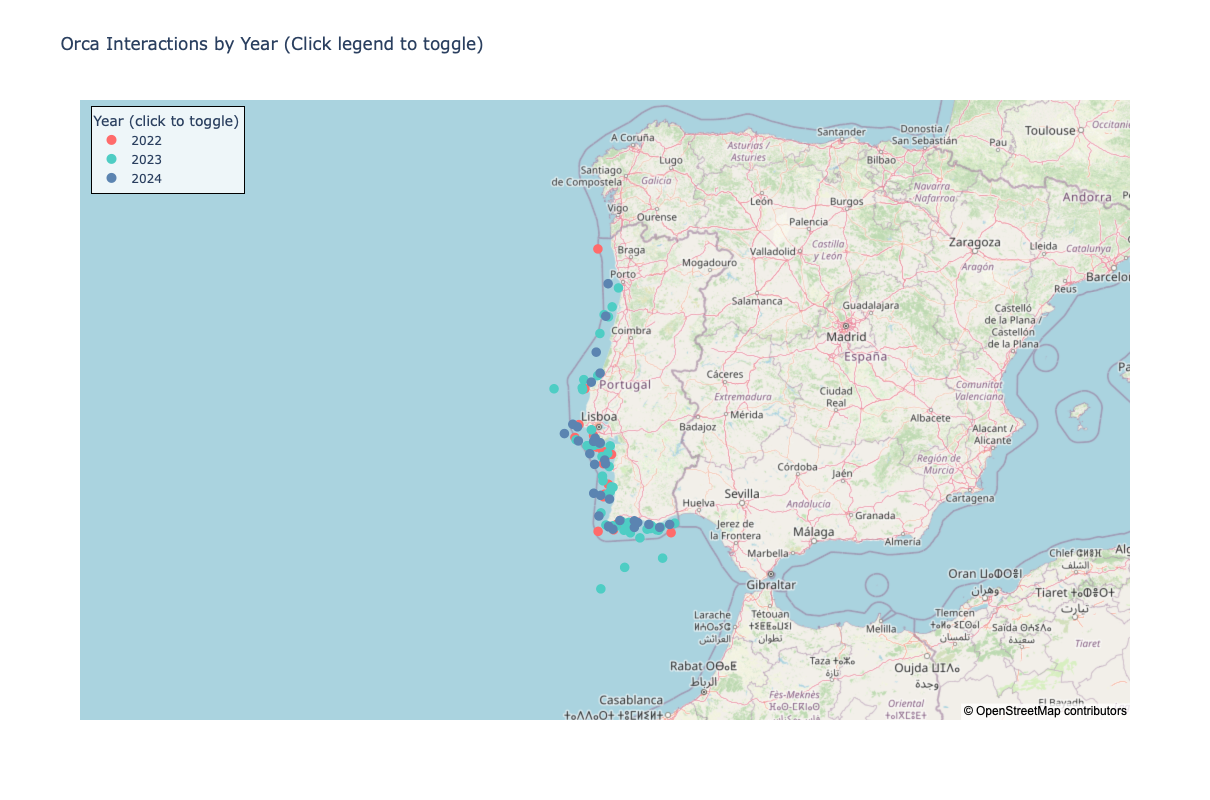

Map saved to docs/orca_map_by_year.html


In [44]:
# New html plot to see the orca interactions without route lines


# Convert year to string for better color mapping
df['year_str'] = df['year'].astype(str)

# Create the map with year as color
fig = px.scatter_mapbox(
    df,
    lat='decimalLatitude',
    lon='decimalLongitude',
    color='year_str',  # Color by year
    hover_data=['eventDate', 'sss', 'sst', 'bathymetry', 'shoredistance', 'occurrenceID'],
    title='Orca Interactions by Year (Click legend to toggle)',
    zoom=5,
    height=800,
    width=1400,
    color_discrete_sequence=['#FF6B6B', '#4ECDC4', '#5B84B1']  # More distinct colors
)
# Update marker size and hover label font color
fig.update_traces(
    marker=dict(size=10),
    hoverlabel=dict(
        font_size=12,
        font_family="Arial",
        font_color="black"
    )
)


fig.update_layout(
    mapbox_style="open-street-map",
    mapbox=dict(
        center=dict(
            lat=39.0,
            lon=-9.0
        ),
        zoom=5
    ),
    legend=dict(
        title="Year (click to toggle)",
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01,
        bgcolor="rgba(255, 255, 255, 0.8)",
        bordercolor="Black",
        borderwidth=1
    )
)

# Show the plot
fig.show()

# Save to HTML
fig.write_html("docs/orca_map_by_year.html")
print("Map saved to docs/orca_map_by_year.html")